In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
#Оставляем только Sepal length и sepal width
iris_data = data.iloc[:,0:2]
iris_data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [6]:
iris_target = iris.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.33)

In [8]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
lda = LinearDiscriminantAnalysis()

In [10]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 1, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 0])

In [12]:
#разница факт прогноз
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [13]:
result

,0,1
0,2,1
1,1,2
2,2,1
3,1,1
4,2,1
5,0,0
6,2,2
7,2,2
8,1,2
9,1,1


In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_test, lda.predict(X_test))

0.78

In [16]:
#Получили не плохую точность предсказания

In [17]:
# Коэфф
lda.coef_

array([[-6.19383975,  7.46679392],
       [ 2.15360079, -3.85653831],
       [ 4.99186014, -4.58940928]])

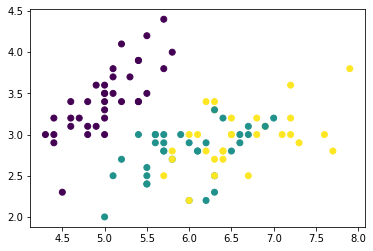

In [18]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [19]:
#Видим что категории 1 и 2(Iris-Versicolour и Iris-Virginica) довольно близки, поэтому рассмотрим лучше их :)

In [20]:
small_train = X_train[(y_train == 1) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 1) | (y_train == 2)]
small_test = X_test[(y_test == 1) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 1) | (y_test == 2)]

In [21]:
X_train[(y_train == 0)]

,sepal length (cm),sepal width (cm)
43,5.0,3.5
36,5.5,3.5
20,5.4,3.4
41,4.5,2.3
33,5.5,4.2
42,4.4,3.2
28,5.2,3.4
17,5.1,3.5
32,5.2,4.1
40,5.0,3.5


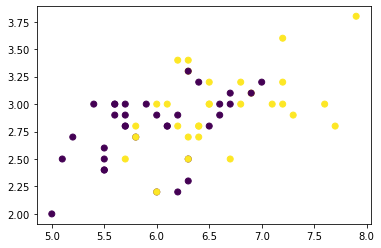

In [22]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [23]:
#Видим что многие значения 1 и 2(Iris-Versicolour и Iris-Virginica) частично перемешаны с друг другом.

In [24]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [25]:
# посмотрим на наши центроиды
lda_small.means_

array([[5.96764706, 2.77647059],
       [6.60333333, 2.96333333]])

In [26]:
from matplotlib import colors

In [27]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

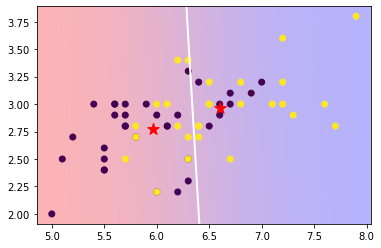

In [28]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [29]:
lda_small.coef_

array([[2.06699447, 0.1288879 ]])

In [30]:
# Как видим один признак не сильно важнее другого

In [31]:
accuracy_score(sy_test, lda_small.predict(small_test))

0.7222222222222222

## K - means

In [32]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data = data.iloc[:,0:2]
iris_target = iris.target
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.4)

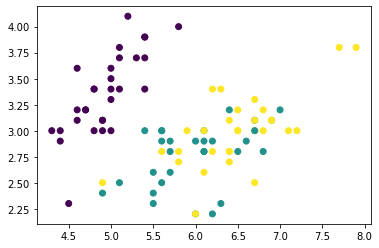

In [33]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)

In [34]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X_train)

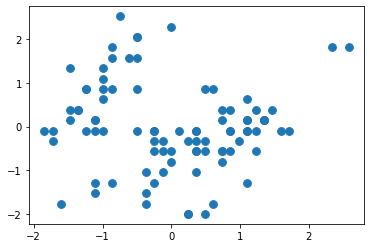

In [42]:
#Выведем данные после масштабирования
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=60)

In [43]:
from sklearn.cluster import KMeans

In [49]:
# явно указываем количество кластеров, в нашем случае 3 категории-кластера
kmeans = KMeans(n_clusters=3)
# обучаем
clusters = kmeans.fit_predict(X_scaled)

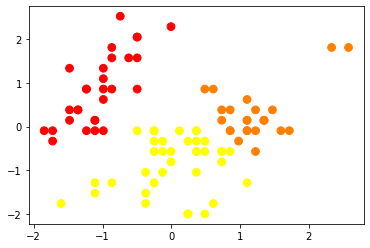

In [50]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

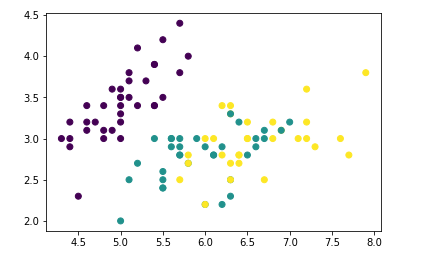


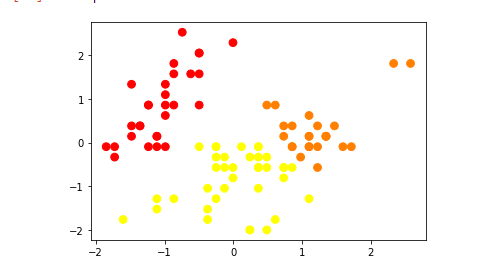
Модель K-means не учитывает некоторые параметры, просто группируя вокруг центров. Полагаться только на нее думаю не совсем правильно, как вы видим по результатам